In [110]:
#carga de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [111]:
#importacion de datos
df=pd.read_csv('F:/Data Science/IA/Practicas/Bienes raices/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


c:\Users\Mauro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

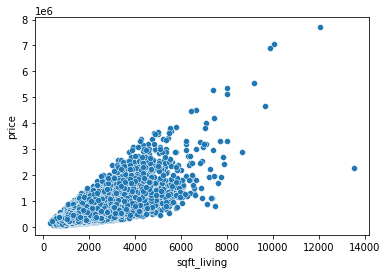

In [112]:
#visualizacion
sns.scatterplot(df['sqft_living'],df['price'])

<AxesSubplot:>

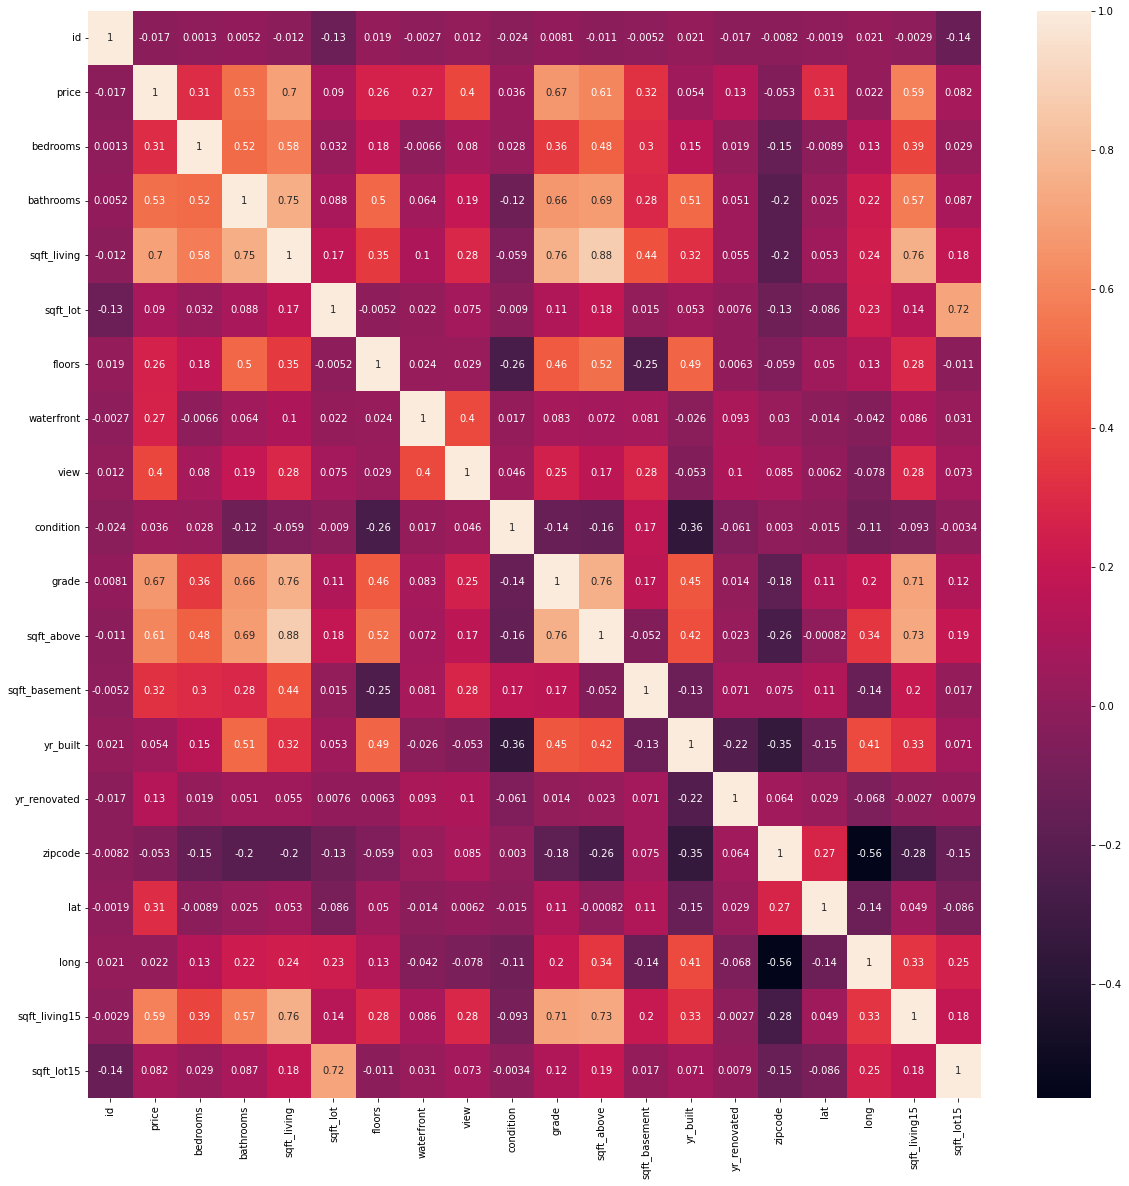

In [113]:
f, ax = plt.subplots (figsize = (20, 20))
sns.heatmap(df.corr(), annot=True)

In [114]:
#seleccion de variables que interesan
selected_features = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement']

In [115]:
#Variables X e Y (objetivo) del modelo
x = df[selected_features]
y = df['price']

In [116]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [117]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [118]:
#importo preprocesamiento de escalado de datos
from sklearn.preprocessing import MinMaxScaler

In [119]:
#creo es escalado de datos de x
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [120]:
#escalado de datos de y
y=y.values.reshape(-1,1)
y_scaled=scaler.fit_transform(y)

In [121]:
#entrenamiento separamos el 25% de los datos para prueba y 75% para entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled,test_size=0.25)

In [122]:
#crear modelo
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=[7]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               800       
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [124]:
#compilacion con optimizacion de funciones de perdida (se usa Adam)
model.compile(optimizer='Adam', loss='mean_squared_error')

In [125]:
#entrenamiento del modelo
epochs_hist = model.fit(x_train,y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 9.7698e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.8907e-04
Epoch 10/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 

In [126]:
#evaluacion del modelo
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Valor')

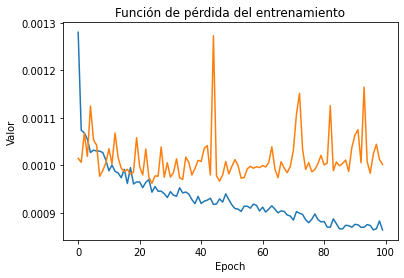

In [127]:
#graficando
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Función de pérdida del entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Valor')

In [128]:
#pesos
model.get_weights()

[array([[-2.10441649e-01, -1.55195013e-01, -9.07370746e-02,
          4.44929823e-02, -3.21287125e-01, -1.27717003e-01,
         -2.72463351e-01, -4.10174012e-01, -9.29698795e-02,
          3.39093179e-01,  7.78827257e-03,  3.74778539e-01,
         -1.65701061e-01,  2.53393054e-01, -2.15797231e-01,
          4.77628499e-01, -1.65157557e-01, -3.69307548e-01,
         -1.30073398e-01, -2.70359933e-01,  2.50433356e-01,
          1.96773037e-01, -1.47602066e-01,  1.40816882e-01,
          1.09698012e-01, -4.00170274e-02, -1.08506605e-01,
         -7.28273764e-02, -1.92625031e-01, -4.00887460e-01,
          9.05470476e-02,  4.48667467e-01,  3.76534611e-01,
         -2.68499672e-01,  2.19132662e-01, -3.43930990e-01,
         -2.84609161e-02, -2.76765347e-01, -4.64797020e-01,
         -2.38089606e-01,  1.17755951e-02, -1.25051558e-01,
         -3.36884439e-01,  5.69730699e-01,  2.37189054e-01,
          4.43857647e-02, -1.81558594e-01,  1.37736768e-01,
         -1.75758168e-01,  7.98122883e-0

In [129]:
#prediccion ejemplo
#recordar variables 'bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement'
pred_val = np.array([[4,3,1960,5000,1,2000,3000]])
scaler_pred=MinMaxScaler()
pred_val_scaled = scaler_pred.fit_transform(pred_val)
result=model.predict(pred_val_scaled)
result

1/1 [==============================] - 0s 102ms/step


array([[0.0202696]], dtype=float32)

In [130]:
#escalar de nuevo a dolares el resultado
result=scaler.inverse_transform(result)
result

array([[229555.69]], dtype=float32)